## Importando as bibliotecas necessárias

In [1]:
#!/usr/bin/env python
import re
import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import random
import pandas as pd

from wordcloud import WordCloud, STOPWORDS


## Lendo o csv limpando os tweets

In [28]:
# /home/lupum/Downloads
dfThor = pd.read_csv('/home/lupum/Downloads/data.csv')       # lendo o arquivo

cached_stop_words = ["i","ThorRagnarok","#ThorRagnarok", "neutral","negative","positive","me","my","myself","we","our","ours","ourselves","you","your","yours","yourself","yourselves","he","him","his","himself","she","her","hers","herself","it","its","itself","they","them","their","theirs","themselves","what","which","who","whom","this","that","these","those","am","is","are","was","were","be","been","being","have","has","had","having","do","does","did","doing","a","an","the","and","but","if","or","because","as","until","while","of","at","by","for","with","about","against","between","into", "through", "during","before", "after","above", "below","to", "from","up", "down","in","out","on","off","over","under","again","further",
"then","once","here","there","when","where","why","how","all","any","both","each","few","more","most","other","some","such","no","nor","not","only","own","same","so","than","too","very","s","t","can","will","just","don","should","now","d","ll","m","o","re","ve","y","ain","aren","couldn","didn","doesn","hadn","hasn","haven","isn","ma","mightn","mustn","needn","shan","shouldn","wasn","weren","won","wouldn","de","a","o","que","e","do","da","em","um","para","com","não","uma","os","no","se","na","por","mais","as","dos","como","mas","ao","ele","das","à","seu","sua","ou","quando","muito","nos","já","eu","também","só","pelo","pela","até","isso","ela","entre","depois","sem","mesmo","aos","seus","quem","nas","me","esse","eles","você","essa","num","nem","suas","meu","às","minha","numa","pelos","elas","qual","nós","lhe","deles","essas","esses","pelas","este","dele","tu","te","vocês","vos","lhes","meus","minhas","teu","tua","teus","tuas","nosso","nossa","nossos","nossas","dela","delas","esta","estes","estas","aquele","aquela","aqueles","aquelas","isto","aquilo","estou","está","estam","estive","esteve","estivemos","estiveram","estava","estávamos","estavam","estivera","estivéramos","esteja","estejamos","estejam","estivesse","estivéssemos","estivessem","estiver","estivermos","estiverem","hei","há","havemos","hão","houve","houvemos","houveram","houvera","houvéramos","haja","hajamos","hajam","houvesse","houvéssemos","houvessem","houver","houvermos","houverem","houverei","houverá","houveremos","houverão","houveria","houveríamos","houveriam","sou","somos",
"são","era","éramos","eram","fui","n","2017","n nodin n", "grvii","foi","fomos","foram","fora","fôramos","seja","sejamos","sejam","fosse","fôssemos","fossem","for","formos","forem","serei","será","seremos","serão","seria","seríamos","seriam","tenho","tem","temos","tém","tinha","tínhamos","tinham","tive","55","55555", "a", "e", "i", "o", "u", "555555","teve","tivemos","tiveram","tivera","tivéramos","tenha","tenhamos","tenham","tivesse","tivéssemos","tivessem","tiver","tivermos","tiverem","terei","terá","teremos","terão","teria","55555555", "http", "https","50", "8","teríamos", "sentiment", "text", "user", "twitter","teriam" ]
# Colocando os twiters  em uma listaa
listaTextoT = dfThor['text'].tolist() # transformando a coluna no csv que possui os twittes em lista
#  Função para limpar os twiters
word_L = [] # lista com todos os twiters
def clean_tweet3():
    for tweet in listaTextoT:
        for word in str(tweet).split():
            word = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", word)
            word = re.sub('^u\'','',word)
            word = re.sub('\'','',word)
            word = word.lower()
            if len(word) > 4:
                if str(word) not in cached_stop_words:
                    word_L.append(word)
print(clean_tweet3()) # aplicando a limpeza 

None


#### Coluna do arquivo csv baixado

In [11]:
dfThor.columns

Index(['sentiment', 'text', 'user'], dtype='object')

## Plotando em uma figura as principais palaras

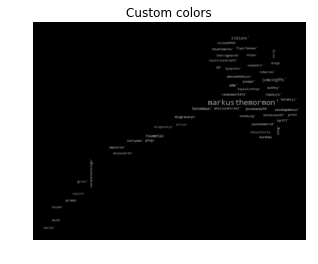

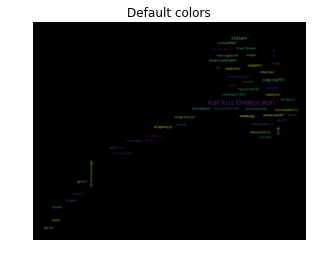

In [23]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

d = path.dirname('__file__')


mask = np.array(Image.open(path.join(d, "thor-abre.png")))

# adding movie script specific stopwords
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

wc = WordCloud(max_words=50, mask=mask, stopwords=stopwords, margin=10,
               random_state=1).generate(str(word_L))

# store default colored image
default_colors = wc.to_array()
plt.title("Custom colors")
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
wc.to_file("a_new_hope.png")
plt.axis("off")
plt.figure()
plt.title("Default colors")
plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
plt.show()


## Calculando a frequência de cada palavra

In [24]:
word_freq = {}
for word in word_L:
    if len(word) > 4:
        if word in word_freq.keys():
                word_freq[word] = word_freq[word] + 1
        else:
            word_freq[word] = 1
        
def sort_dictionary( wordDict ):
    sortedList = []
    for entry in sorted(wordDict.items(), key = lambda kv: (-kv[1], kv[0]) ):
        sortedList.append( entry )
    return sortedList

# Print top ten words for JBS
sorted_word_freq = sort_dictionary(word_freq)
top_ten = []
print("Top 10 palavras para #ThorRagnarok:")
for i in range(10):
    top_ten.append(sorted_word_freq[i])
    print(sorted_word_freq[i])


Top 10 palavras para #ThorRagnarok:
('markusthemormon', 12)
('benamaun', 2)
('eldians', 2)
('jumping99s', 2)
('tsumetai ame', 2)
('                n nodin n        ', 1)
(' 2017  n ncr  ', 1)
(' grvii', 1)
(' thorragnarok', 1)
('alex158lopez', 1)


## Plotando a frequência das palavras

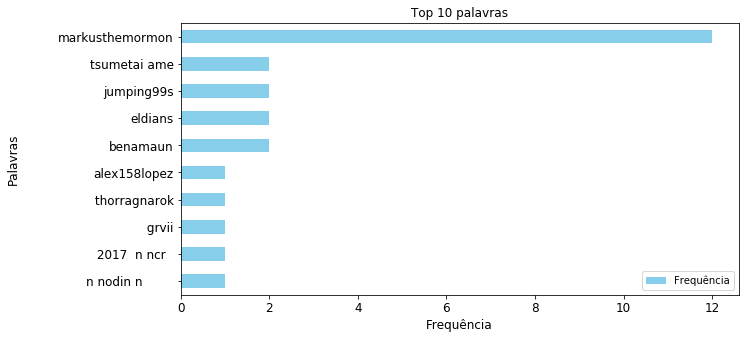

In [26]:
df = pd.DataFrame(top_ten)
df[1] = pd.to_numeric(df[1])
df.columns = ["Words","Frequência"]
df.index = df.Words
df = df.sort_values(by='Frequência', ascending=1)
top_10 = df[['Words','Frequência']].plot(kind='barh', title ="Top 10 palavras",figsize=(10,5),legend=True, fontsize=12,color='skyblue')
top_10.set_xlabel("Frequência",fontsize=12)
top_10.set_ylabel("Palavras",fontsize=12)
plt.savefig('imgThorRagnarok.jpg')  
plt.show()